<h1>PRÁCTICA 1 - FUNDAMENTOS DE APRENDIZAJE AUTOMÁTICO</h1>
<h3>Realizada la práctica por:<br/>
    <ol>
    -Pablo Díez del Pozo<br/>
    -Alejandro Alcalá Álvarez
    </ol>
 </h3>
<h3>Grupo: 1461</h3>
<h3>Pareja: 01</h3>

In [2]:
#!/usr/bin/python3
# -*- coding: utf-8 -*-

<h3>Importaciones necesarias para la ejecucion del código</h3>
<p>Podemos observar todos los import necesarios que tenemos que realizar para que la ejecución de nuestro codigo funcione a la perfección, a continuación, explicaremos cada uno de los imports y para que son necesarios:</p>
<ol>
    <li>Random: se utiliza para hacer las secuencias de índices aleatorios para las particiones de entrenamiento y de clasificación.
    <li>Math: se utiliza para hacer la distribución normal para los atributos que sean continuos y asi poder calcular su probabilidad.
    <li>Numpy: Es la libreria mas utilizada en esta práctica, debido a que almacenamos los datos en una matriz numpy y guardamos las probabilidades posterioris de los atributos en un array de matrices de numpy.
    <li>ABC: se utiliza para haces clases y métodos abstractos.
    <li>Datos: se utiliza para importar toda la funcionalidad de nuestro modulo Datos.
    <li>Collections: se utiliza para contabilizar las probabilidades condicionadas y para ver cuantas clases hay en el fichero
    <li> SortedDict: se utiliza para ordenar el diccionario que creamos con las probabilidades a priori de cada clase
    <li>Sklearn: se utiliza para hacer el tercer apartado de esta práctica, donde nos da una implementación del algoritmo de Naive-Bayes
    <li>Pyplot: se utiliza en el último apartado de la práctica, donde nos da una implementación para pintar la curva ROC.
     

In [3]:
import random
import math
import numpy as np
from abc import ABCMeta, abstractmethod
from Datos import Datos
from collections import Counter
from sortedcontainers import SortedDict
from sklearn.metrics import confusion_matrix, auc
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_val_predict
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from EstrategiaParticionado import Particion

<h3>Obtener los datos de los Distintos Dataset</h3>
<p>Aqui vamos a poder observar como vamos a codificar los datos que nos dan en un fichero a una matriz Numpy para poder tratar los datos para poder entrenarlos y clasificarlos con Naive-Bayes</p>
<p>Vamos a ver como llamando a la clase Datos y que en su constructor le ponemos la ruta del fichero se crea la matriz numpy de los datos, pero a demás de esa matriz también guardamos información necesaria para poder entrenarlos y clasificarlos correctamente. Por ejemplo, guardamos si los atributos son continuos o discretos.</p>
<p>A continuación, vamos a mostrar una ejecución para cada uno de los conjuntos de datos que nos dan para hacer Naive-Bayes. En la celda de abajo vereis la ejecución.</p>

In [4]:
dataset = Datos('../Datasets/lenses.data')
print("==============MATRIZ NUMPY DEL CONJUNTO DE DATOS LENSES=====================")
print(dataset.datos)
print("============================================================================")

==============MATRIZ NUMPY DEL CONJUNTO DE DATOS LENSES=====================
[[0. 0. 0. 0. 2.]
 [0. 0. 0. 1. 1.]
 [0. 0. 1. 0. 2.]
 [0. 0. 1. 1. 0.]
 [0. 1. 0. 0. 2.]
 [0. 1. 0. 1. 1.]
 [0. 1. 1. 0. 2.]
 [0. 1. 1. 1. 0.]
 [1. 0. 0. 0. 2.]
 [1. 0. 0. 1. 1.]
 [1. 0. 1. 0. 2.]
 [1. 0. 1. 1. 0.]
 [1. 1. 0. 0. 2.]
 [1. 1. 0. 1. 1.]
 [1. 1. 1. 0. 2.]
 [1. 1. 1. 1. 2.]
 [2. 0. 0. 0. 2.]
 [2. 0. 0. 1. 2.]
 [2. 0. 1. 0. 2.]
 [2. 0. 1. 1. 0.]
 [2. 1. 0. 0. 2.]
 [2. 1. 0. 1. 1.]
 [2. 1. 1. 0. 2.]
 [2. 1. 1. 1. 2.]]


In [5]:
dataset2 = Datos('../Datasets/tic-tac-toe.data')
print("==============MATRIZ NUMPY DEL CONJUNTO DE DATOS TIC-TAC-TOE================")
print(dataset2.datos)
print("============================================================================")

==============MATRIZ NUMPY DEL CONJUNTO DE DATOS TIC-TAC-TOE================
[[2. 2. 2. ... 1. 1. 1.]
 [2. 2. 2. ... 2. 1. 1.]
 [2. 2. 2. ... 1. 2. 1.]
 ...
 [1. 2. 1. ... 1. 2. 0.]
 [1. 2. 1. ... 1. 2. 0.]
 [1. 1. 2. ... 2. 2. 0.]]


In [6]:
dataset3 = Datos('../Datasets/german.data')
print("==============MATRIZ NUMPY DEL CONJUNTO DE DATOS GERMAN=====================")
print(dataset3.datos)
print("============================================================================")

==============MATRIZ NUMPY DEL CONJUNTO DE DATOS GERMAN=====================
[[ 0.  6.  4. ...  1.  0.  0.]
 [ 1. 48.  2. ...  0.  0.  1.]
 [ 3. 12.  4. ...  0.  0.  0.]
 ...
 [ 3. 12.  2. ...  0.  0.  0.]
 [ 0. 45.  2. ...  1.  0.  1.]
 [ 1. 45.  4. ...  0.  0.  0.]]


<h3>Apartado 1: Estrategia de Particionado</h3>
<p>En este apartado vamos a probar las dos estrategias de particionado de los datos que hemos tenido que implementar en esta práctica, las cuales son:</p>
    <ol>
        <p>- Validación Simple.</p>
        <p>- Validación Cruzada.</p>
    </ol>
<p>Nuestra estrategia de <strong>validación simple</strong> consiste en meterle un porcentaje por el cual queremos dividir el conjunto de datos en dos subconjuntos de datos, donde uno lo vamos a utilizar para entrenar y el otro lo vamos a utilizar para hacer la predicción con nuestro clasificador. En la celda de abajo mostraremos el código necesario para poder realizar correctamente la validacion simple.</p>
<p>Como podemos observar en el código de abajo de validación simple, lo que hacemos es que ponemos una semilla a random y decimos que el numero de particiones va a ser uno. A continuación, haremos un permutacion de numeros aleatorios entre el 0  y el número de datos que hay en el fichero. Por ultimo, lo que hacemos es que le creamos la partición que va a tener en su interior los dos subconjuntos de Train y Test. En esa permutación lo multiplicamos por el porcentaje que le hemos dado nosotros para crear los dos suboconjuntos.</p>
<p>Debajo de esta celda vamos a comprobar en como funciona  la validación simple con diferentes porcentajes para obtener el subconjunto de datos de Train y Test, en los diferentes conjuntos de datos </p>

In [7]:
class Particion():

  # Esta clase mantiene la lista de �ndices de Train y Test para cada partici�n del conjunto de particiones
  def __init__(self, train=[], test=[]):
    self.indicesTrain = train
    self.indicesTest = test

  def __str__(self):
    return "Train: {}\nTest:  {}".format(str(self.indicesTrain), str(self.indicesTest))

class EstrategiaParticionado:
  # Clase abstracta
  __metaclass__ = ABCMeta

  # Lista de las particiones
  def __init__(self, nombre=""):
    self.nombreEstrategia = nombre
    self.numeroParticiones = 0
    self.particiones = []

  # Atributos: deben rellenarse adecuadamente para cada estrategia concreta: nombreEstrategia, numeroParticiones, listaParticiones. Se pasan en el constructor

  @abstractmethod
  # TODO: esta funcion deben ser implementadas en cada estrategia concreta
  def creaParticiones(self, datos, seed=None):
    pass

class ValidacionSimple(EstrategiaParticionado):

  def __init__(self, porcentaje):
    self.porcentaje = porcentaje
    super().__init__("Validacion simple")

  # Crea particiones segun el metodo tradicional de division de los datos segun el porcentaje deseado.
  # Devuelve una lista de particiones (clase Particion)
  # TODO: implementar
  def creaParticiones(self, datos, seed=None):

    np.random.seed(seed)
    self.numeroParticiones = 1

    # Generamos una lista con todos los números de datos aleatorios
    indicesAleatorios = np.random.permutation(int(datos.numDatos))

    # Creamos la particion, en funcion del porcentaje especificado
    self.particiones = [Particion(indicesAleatorios[:int(datos.numDatos * self.porcentaje)],
                                  indicesAleatorios[int(datos.numDatos * self.porcentaje):])]

    return self.particiones

In [8]:
print("==============VALIDACIÓN SIMPLE CON LENSES DATA 70%======================")
estrategia = ValidacionSimple(0.7)
estrategia.creaParticiones(dataset)
print(estrategia.particiones[0])
print("=========================================================================")

==============VALIDACIÓN SIMPLE CON LENSES DATA 70%======================
Train: [18  4 21  5  6 13 17 15 22 19 23 12 20  8 16  0]
Test:  [14  7  3  1  2  9 10 11]


In [9]:
print("==============VALIDACIÓN SIMPLE CON TIC-TAC-TOE DATA 80%=================")
estrategia2 = ValidacionSimple(0.8)
estrategia2.creaParticiones(dataset2)
print(estrategia2.particiones[0])
print("=========================================================================")

==============VALIDACIÓN SIMPLE CON TIC-TAC-TOE DATA 80%=================
Train: [925 424 846 255 847 879 254 630 590 704 957 672  45  10 384 573  37 336
 196 292 666 592  23 418 390 712 324 618 126 408  47 795 476 381 377 155
 818 546 697 460 619 434 109 757 399 445 366 269 657 944 884 547 249 346
 250 230 504  49 708 149 107 888 533  69 125 529 137 698 264 803 304 108
 629 305 379 652  76 365 548 724 436   0 245 475 286 265 865 257 353 326
 205 908 124 863   7 466 937 857 113 276 917 119  70 655 816 575 472 920
 877 534 714 238 299 190 523 600 435 510 617 842  46 584 768 151 694 133
  74 864 274 194 769 191 807 825 139 329 116 483 781 495 628 907 906 605
 310 759 824 463 612 345 945 609 512 178 656 493 380 662 222 892 709 766
 701 290  15 891 859 102 572 844 316 464 442 794 110 561 671 598 586 731
 568 854 950 639 306  44 136 743  14 513 168 268 165 303 331 450 373  51
 820 776 302 361 275  17  84 114 651 851 330 834 215 403 626 947 771 501
 935 789 557 702 481 184 848 706 623  50 76

In [10]:
print("==============VALIDACIÓN SIMPLE CON GERMAN DATA 75%======================")
estrategia3 = ValidacionSimple(0.75)
estrategia3.creaParticiones(dataset3)
print(estrategia3.particiones[0])
print("=========================================================================")

==============VALIDACIÓN SIMPLE CON GERMAN DATA 75%======================
Train: [ 65 722 750 189 594 450 851 551 105 818 313 720 560 664 285 606 610 343
 569  72 786 223 662 943 113 455 828  43 691 580 449 119 200 495 875 764
  21 476 848  96 713 883 312 882 408  12 588 494 404 587  99  36 515 127
 454  42 891 136 810 283 558 731 822 765 628 789 233 624 507 210 955 322
 753 601 349 880  77 925 170   6 306 854  40 779 453 600 555 297 642 730
 946 504 567 413 444 591 339 138 524 778 899 202 714 919 935 438  78 566
 518 316 436 632 733 593 915 332 758 929 355 644 712 881  56 990 914 172
 434  13 328 241 768 502 965 808 364  31 633 295 616 192 683 787 672 777
 756 811 653 146 746 592 177 665 638 289 892 522 845 492 944 703 976 206
  29 873 472 926 692 275 489 987  19 766 237 790 342 514 682 471 120 354
 896 900 620 314 954 619 276 475 940 550 141 213 512 293  95 451 932 155
 130 163 257 117  58 398 992 307 536 166 739 583 468  73 806 291 114 719
 187  60 218 484 679 526 902 365 975 226 21

<p>Nuestra estrategia de <strong>validación cruzada</strong> consiste en dividir nuestro conjunto de datos en particiones de Train y Test como en validación simple, pero este proceso lo vamos a hacer K veces, para que todos los datos esten presenten en los dos subconjunto de datos para poder obtener una mejora a la hora de entrenar y clasificar.A continuación, mostraremos nuestra implementación de la validación cruzada; donde vamos a hacer K veces las divisiones del conunto de datos y si por algún motivo nuestra división de todos los subconjuntos no es perfecta balancearemos los datos sobrantes para poder entrenarlos y clasificarlos.</p>

In [11]:
class ValidacionCruzada(EstrategiaParticionado):

  # Crea particiones segun el metodo de validacion cruzada.
  # El conjunto de entrenamiento se crea con las nfolds-1 particiones y el de test con la particion restante
  # Esta funcion devuelve una lista de particiones (clase Particion)
  # TODO: implementar

  def __init__(self, k):
    self.k = k
    super().__init__("Validacion cruzada")

  def creaParticiones(self, datos, seed=None):
    np.random.seed(seed)

    self.numeroParticiones = self.k

    # Generamos una lista con todos los números de datos aleatorios
    indicesAleatorios = np.random.permutation(int(datos.numDatos))

    # Hallamos el tamaño de cada bloque
    tamBloque = int(datos.numDatos / self.k)

    datosSobran = datos.numDatos - (tamBloque * self.k)
    count = 0
    for i in range(self.k):

      train = np.delete(indicesAleatorios, range(i * tamBloque, (i + 1) * tamBloque))
      test = indicesAleatorios[i * tamBloque:(i + 1) * tamBloque]

      # Caso en el que la cuenta es justa
      if datosSobran == 0:
        self.particiones.append(Particion(train, test))

      # Contemplamos el caso de que la division para sacar el numero de subconjuntos no fuese entera
      if datosSobran > 0:
        count += 1
        particionTest = np.append(test, train[(datos.numDatos - tamBloque) - i - 1])
        particionTrain = np.delete(train, (datos.numDatos - tamBloque) - i - 1)
        datosSobran -= 1
        self.particiones.append(Particion(particionTrain, particionTest))

<p>A continuación, mostraremos la ejecución de nuestra estrategia de partcionado validación simple o también llamada K-fold, con los diferentes conjuntos de datos y con diferentes K's. Vamos poder observar en la salida de nuestra celda que todos los valores van a estar una vez en la partición de Test.</p>


In [12]:
print("==============VALIDACIÓN CRUZADA CON LENSES DATA K=5======================")
estrategia1 = ValidacionCruzada(5)
estrategia1.creaParticiones(dataset)
for particion in estrategia1.particiones:
    print(particion)
print("==========================================================================")

==============VALIDACIÓN CRUZADA CON LENSES DATA K=5======================
Train: [22  3  9 12  7 20 16  5  2 18  0  6 15 11  8 13 17 10 23]
Test:  [21  4 19 14  1]
Train: [21  4 19 14  7 20 16  5  2 18  0  6 15 11  8 13 17 10  1]
Test:  [22  3  9 12 23]
Train: [21  4 19 14 22  3  9 12  2 18  0  6 15 11  8 13 17 23  1]
Test:  [ 7 20 16  5 10]
Train: [21  4 19 14 22  3  9 12  7 20 16  5 15 11  8 13 10 23  1]
Test:  [ 2 18  0  6 17]
Train: [21  4 19 14 22  3  9 12  7 20 16  5  2 18  0  6 17 10 23  1]
Test:  [15 11  8 13]


In [13]:
print("==============VALIDACIÓN CRUZADA CON TIC-TAC-TOE DATA K=8=================")
estrategia21 = ValidacionCruzada(8)
estrategia21.creaParticiones(dataset2)
for particion in estrategia21.particiones:
    print(particion)
print("=========================================================================")

==============VALIDACIÓN CRUZADA CON TIC-TAC-TOE DATA K=8=================
Train: [ 35 846 877 147 931 838 286 477  50 766 172 243 945 625 906 141 323  53
 356 424 729 796 539 692  68 511 387 563 657 115 359 780 347 558 636 697
 643 668 482 475 493 848 520 407 705 867 725 474  90 230 521 532 137 883
  10 330 478  76 728  73 246 547 869 555 640 313 661 826 586 476 669 613
 403 663  25 615 836 752 875 768 177 340 315 158 191   9 279 885 899 153
 821 213 451 245 591 132 256 471 193  42 194 850 155 528 559 814 687 831
 602 890 250 456 259 815 651 569 264 452 541 233 299 117 616 290 799 590
 486 111 480 673 136 554 949 237 934 360 496 886 741 944 434 576 248  45
 903 253 683 893 269 375 852 332 135 498 504 441 630 919  81  71 658 433
 722 112 207 604  66 894  40 543 533 305 392 927 732  72 386 522 105 400
 198 897 858 823 331 358 691  19 734 488 785 152 817 447  69 854 742  59
  88 391 252 565 142 211 308 763 904 401 418 951 173 103 666 620 222 366
 581  32 866 655 119 641 715 160 614  28 6

Train: [870 461 896 940 740 419 914 654 124 599 472 309 266 677 629 935 771 767
 800 718 819 368 675 192 561 638  16 536 828  75 146 234 626 288 874 291
 494 284 317 212 339 301 595 181 118 686 923 515 428 276 656 802 603 822
  58  13 306 606 165 574 770 409 762 667 946 395 921 523 908 316 122 380
 446 865 810 871  61 116 499 793 540 507 608 199 410  26 707 439 352 726
 322 102 422 628 526 775 594 138 399 779 244 688 905 872 922 272 205 450
   1 265 534 402  56 178 382 911 659 797 145  35 846 877 147 931 838 286
 477  50 766 172 243 945 625 906 141 323  53 356 424 729 796 539 692  68
 511 387 563 657 115 359 780 347 558 636 697 643 668 482 475 493 848 520
 407 705 867 725 474  90 230 521 532 137 883  10 330 478  76 728  73 246
 547 869 555 640 313 661 826 586 476 669 613 403 663  25 615 836 752 875
 768 177 340 315 158 191   9 279 885 899 153 821 213 451 245 591 132 256
 471 193  42 194 850 155 528 559 814 687 831 602 890 250 456 259 815 651
 569 264 452 541 233 299 117 616 290 799 590

In [14]:
print("==============VALIDACIÓN CRUZADA CON GERMAN DATA K=4=====================")
estrategia31 = ValidacionCruzada(4)
estrategia31.creaParticiones(dataset3)
for particion in estrategia31.particiones:
    print(particion)
print("=========================================================================")

==============VALIDACIÓN CRUZADA CON GERMAN DATA K=4=====================
Train: [ 26 806 260 577 751 326 925 799  42 273 717 484 423 477 964  80 476 822
 329 146 619 502 162 739 664  16 624 638 821  43 931  32 956 432 509 390
 166 286 411 548 569 618 829 693 897  96 789 737 905 864 932  65 930 126
 367 777 584 174 410 160 911 291 922 258 121 313 255 916 714 971 105 271
 977 525 519  36 580 627 456 836 181 254 839 660  71 220 288 968 928 110
  74 745 479 988 199 135 678 729  48 755 592 222 314 942 264  25 616 430
 151 866 689 823 856 249 889 945  76 374 378 111 826 582 171 743 609 959
 155 261  12 991 551 481 389 986  68 208 890   0 355 351  27 863 284 833
 143 838 217 796 167 478 447 673 603 615 819 185 793 992 834 606 412 159
 583 990 625 507  73 754 944 360 298 952 118 349 169 521 712 907 192 742
 620 376 675 915 531 760 805  99 153 985 790 473 107 884 154  90 720 713
 179 832 405 721 804 874 493 517 827  61 997 696 921 614 103 465 576 941
 865  47 373 453 894  57 328 752 757 647 25

<h3>Apartado 2: Naive-Bayes</h3>
<p>Es un clasificador de datos que se basa en la regla de Bayes. Donde primero vamos a dividir el conjunto de datos y poder particionarlo en dos subconunto de datos con validación simple o en varios subconjunto de datos con validación cruzada. En el código que mostramos a continuación es lo que van hacer todos los clasificadores que podemos implementar. Los métodos de entrenamiento y clasifica cada clasificador lo hace el clasificador debido a que los métodos que van a utilizar son únicos y los tenemos que implementar en las clases especificas de cada clasificador.</p>
<p>El método <strong>error</strong> va a comprobar los errores que ha obtenido nuestro clasificador, para ver el error que hemos obtenido se hace comparando la última columna de nuestra matriz de datos con la predicción que hemos obtenido en el método de clasifica del clasificador. Si es dintinto la predicción con la última columna de los datos le sumamos uno y lo vamos a dividir entre el número de lineas que tiene el subconjunto de datos Test.</p>
<p>El método <strong>validación</strong> lo que va hacer es realizar los métodos de entrenamiento, clasifica y calcula error del clasificador seguido sin ninguna interrupcion. El método va a comprobar si le estan pasando validación simple o cruzada con el número de partciones que tiene. Si el tamaño es igual a 1 va a llamar a los métodos mencionados anteriormente y va a devolver el error que ha obtenido tras el entrenamiento y la clasificación. Si el tamaño es mayor a 1 hacemos un bucle que cubra todas las partciones para entrenarlas, clasificarlas y obtener su error, despues de la realización de esos métodos vamos a hacer la media aritmetica de todos los errores obtenidos con las diferentes particiones que tenemos en nuestra estrategia.</p>
<p>El método <strong>matrizConfusion</strong> genera la matriz de confusión utlizando el método confusion_matriz() de SKLearn y calcula las tasas de falsos negativos, verdaderos positivos, verdaderos negativos y falsos positivos, añadiendo las dos tasas necesarias para el análisis ROC a unas listas.</p>
<p>El método <strong>curvaROC</strong> únicamente pinta la curva ROC correspondiente a la clasificación realizada, utliza los datos de las listas generadas en <strong>matrizConfusion</strong> para obtener los valores.</p>

In [15]:
class Clasificador:
  # Clase abstracta
  __metaclass__ = ABCMeta

  # Metodos abstractos que se implementan en casa clasificador concreto
  @abstractmethod
  # TODO: esta funcion debe ser implementada en cada clasificador concreto
  # datosTrain: matriz numpy con los datos de entrenamiento
  # atributosDiscretos: array bool con la indicatriz de los atributos nominales
  # diccionario: array de diccionarios de la estructura Datos utilizados para la codificacion de variables discretas
  def entrenamiento(self, datos, datosTrain, atributosDiscretos, diccionario):
    pass

  @abstractmethod
  # TODO: esta funcion debe ser implementada en cada clasificador concreto
  # devuelve un numpy array con las predicciones
  def clasifica(self, datosTest, atributosDiscretos, diccionario):
    pass

  # Obtiene el numero de aciertos y errores para calcular la tasa de fallo
  # TODO: implementar
  def error(self, datos, pred):
    # Aqui se compara la prediccion (pred) con las clases reales y se calcula el error
    i = 0
    real = datos[:, -1]
    error = 0
    for i in range(len(real)):
      if real[i] != pred[i]:
        error += 1
    err = (error) / (len(real) + 0.0)
    return err

  # Realiza una clasificacion utilizando una estrategia de particionado determinada
  # TODO: implementar esta funcion
  def validacion(self, particionado: object, dataset: object, clasificador: object, seed: object = None) -> object:

    # Creamos las particiones siguiendo la estrategia llamando a particionado.creaParticiones
    # - Para validacion cruzada: en el bucle hasta nv entrenamos el clasificador con la particion de train i
    # y obtenemos el error en la particion de test i
    # - Para validacion simple (hold-out): entrenamos el clasificador con la particion de train
    # y obtenemos el error en la particion test. Otra opci�n es repetir la validaci�n simple un n�mero especificado de veces, obteniendo en cada una un error. Finalmente se calcular�a la media.
    errores = 0
    # particionado.creaParticiones(dataset, seed)
    # Comprobamos si es por validación cruzada o simple, por la longitud de la lista de particiones

    particionado.creaParticiones(dataset)

    # Validación Simple
    if len(particionado.particiones) == 1:
      clasificador.entrenamiento(dataset, particionado.particiones[0].indicesTrain)
      pred = clasificador.clasifica(dataset, particionado.particiones[0].indicesTest)
      ret = self.error(dataset.extraeDatos(particionado.particiones[0].indicesTest), pred)
      if ret > 0:
        return ret
      else:
        return 0

    # Validación Cruzada
    else:
      for particion in particionado.particiones:
        clasificador.entrenamiento(dataset, particion.indicesTrain)
        pred = clasificador.clasifica(dataset, particion.indicesTest)
        ret = self.error(dataset.extraeDatos(particion.indicesTest), pred)
        errores += ret
      error = errores / len(particionado.particiones)

      # Devolucion de la media de los errores
      return error

  def matrizConfusion(self, dataset, datosTest, prediccion):

    # Calculamos la matriz de confusion utlizando sk-learn. Solo se calcula en el caso de que la clasificacion sea binaria.
    testData = dataset.extraeDatos(datosTest)
    clase_real = testData[:, -1]

    matriz = confusion_matrix(prediccion, clase_real)

    # La funcion ravel() devuelve todas las estadisticas relacionadas con la matriz de confusion
    tn, fp, fn, tp = matriz.ravel()


    # Calculamos las tasas extraídas de la matriz de confusión
    tpr = tp / (tp + fn)
    fpr = fp / (fp + fn)

    self.lista_tpr.append(tpr)
    self.lista_fpr.append(fpr)

    return matriz

  def curvaROC(self):

    x = np.linspace(0, 1, 100)
    plt.plot(x, x, c='blue')
    for i in range(len(self.lista_fpr)):
        plt.plot(self.lista_fpr[i],self.lista_tpr[i],'ro')
    plt.show()


<h3>Implementación del Clasificador Naive-Bayes</h3>
<p>En la siguiente celda vamos a poder observar el codigo de entrenamiento y clasifica del clasificador de Naive-Bayes, a continuación explicaremos brevemente el funcionamiento de cada uno de los métodos especificos del clasificador. En este claisificador podemos aplicar la regla de Laplace, que es si obtenemos un cero en algunas de las mátrices de conteos de los datos, es decir, a la hora de calcular P(D|H), tendremos que sumar 1 a todas las celdas de conteos de esa P(D|H).</p>
<p>El método <strong>entrenamiento</strong>, lo primero que hace este método es obtener las probabilidades a priori de las clases que hay en el subconjunto de Test. Al calcular esas probabbilades las introducimos en un diccionario para poder utilizarlas más tarde. Ahora vamos a calcular la P(D|H)que se va a calcular de diferentes maneras para datos continuos o discretos
    <ol>
        <li><strong>Atributos discretos</strong>: se calcula haciendo los conteos de las veces que sale la P(D|H) en el subconjunto de datos Train.</li>
        <li><strong>Atributos continuos</strong>: se calcula la media y desviación tipica del subconjunto de datos Train.</li>
    </ol>
Todo esto se mete en una matriz que tiene los diferentes datos y las diferentes clases del conjunto de datos, donde esa matriz la vamos a utilizar para calcular las probabilidades a posteriori con todos las datos que tiene las matrices que hemos creado.</p>
<p>El método <strong> clasifica</strong> dependiendo de los datos que vamos obteniendo del subconjunto de datos de Test, y vamos a obtener las diferentes probabilidades de las distintas clases que tenemos el problema si nos llega ese dato. Esas probabilidades las guardamos en una lista para luego multiplicarlas por los a priori y poder coger la clase que de más probabilidad para guardarla en la lista de las predicciones de nuestro clasificador Naive-Bayes y así despues obtener el error que hemos obtenenido. Este método tambien clasifica de manera distinta los atributos discretos y continuos:
    <ol>
        <li><strong>Atributos discretos</strong>: se calcula obteniendo el número que hay en la matriz de probabilidades a posteriori que hemos creado anteriormente.</li>
        <li><strong>Atributos continuos</strong>: se calcula haciendo la ecuación de la distribución normal.
   </ol>
 </p>

In [16]:
class ClasificadorNaiveBayes(Clasificador):

  def __init__(self, laplace):
    self.laplace = laplace
    self.lista_fpr = []
    self.lista_tpr = []

  def entrenamiento(self, dataset, datosTrain):

    # Cargamos todos los datos de la clase del dataset desde la matriz de datos
    clasesTrain = dataset.extraeDatos(datosTrain)
    self.numClases = clasesTrain[:, -1]

    # Contamos las apariciones de cada uno para luego calcular la probabilidad a priori de cada clase
    counter = Counter(self.numClases)

    # Calculamos la probabilidad de la clase y lo metemos en un diccionario ordenado segun el numero
    # correspondiente a cada clase asignado en el diccionario
    self.dictPrioris = {}
    for k in counter:
      k = int(k)
      counter[k] = counter[k] / len(self.numClases)
      self.dictPrioris[k] = counter[k]

    # Aqui ordenamos el diccionario para que esten en el mismo orden de como extraemos los datos del dataset
    self.dictPrioris = SortedDict(self.dictPrioris)

    # Calcular tablas de probabilidades del entrenamiento. Tenemos que calcular por cada atributo una cuenta
    # de las apariciones en cada clase
    # Creamos una lista de matrices, donde vamos almacenar todos los datos que hemos obtenido en los datos de Test
    self.posteriori = np.zeros(len(dataset.nombreAtributos) - 1, dtype=object)

    # Recorremos todos los datos de la matriz sin llegar a la clase
    for i in range(len(dataset.nombreAtributos) - 1):

      # Si el dato que obtenemos es Nominal haremos el recuento de todas las veces que sale la P(D|H)
      if dataset.nominalAtributos[i] == True:

        # Creamos una matriz de tamaño X: Número de Atributos menos la clase Y: Número de clases
        post = np.zeros((len(dataset.listaDicts[i]), len(dataset.listaDicts[-1])))

        # Aqui contamos todos las datos que queremos del datos Train para construir la matriz de entrenamiento
        for c in range(len(dataset.listaDicts[-1])):
          datosEnt = dataset.extraeDatos(datosTrain)
          dat = datosEnt[:, i]
          repes = Counter(dat[datosEnt[:, -1] == c])
          for r in repes:
            post[int(r), c] = repes[r]
          if self.laplace == True:
            self.posteriori[i] = post + 1
          else:
            self.posteriori[i] = post

      # Si el dato es Continuo obtendremos la media y la desviación tipica de la clase
      else:

        # Creamos una matriz de X: Los datos de Media y Desivación típica Y: Número de clases
        post = np.zeros((2, len(dataset.listaDicts[-1])))

        # Aqui obtenemos la media y desviación tipica de cada clase, despues de tener los datos de entrenamiento
        for c in range(len(dataset.listaDicts[-1])):
          datosEnt = dataset.extraeDatos(datosTrain)
          dat = datosEnt[:, i]
          datos = dat[datosEnt[:, -1] == c]
          post[0][c] = np.mean(datos)
          post[1][c] = np.std(datos)
        self.posteriori[i] = post


    # Calculamos los valores de los posteriori de todos las tablas anteriores
    for i in range(len(dataset.listaDicts) - 1):
      if dataset.nominalAtributos[i] == True:
        self.posteriori[i] /= sum(self.posteriori[i])




  def clasifica(self, dataset, datosTest):
    acum_probs = 1
    self.prediccion = []
    datTest = dataset.extraeDatos(datosTest)

    # Ahora vamos a estudiar la probabilidad de la clase con los datos obtenidos en el entrenamiento
    # Recorremos todos las datos de la matriz de los datos Test
    for dato in datTest:
      mapa = []
      # Aqui obtenemos los prioris de cada clase para poder obtener la probabilidad de cada una
      for clase in range(len(self.dictPrioris)):
        listaVerosimilitudes = []
        # Aqui obtenemos cada valor posteriori de nuestro entrenamiento de los datos, es decir, P(D|H)
        for atributo in range(len(self.posteriori)):
          if dataset.nominalAtributos[atributo] == True:
            prob = self.posteriori[atributo][int(dato[atributo])][clase]
            listaVerosimilitudes.append(prob)

          # Aqui obtenemos la probabilidad de los atibutos continuos
          else:
            # Hacemos la formula de la distribucion normal
            exp1 = 1 / (self.posteriori[atributo][1][clase] * math.sqrt(2 * math.pi))
            exp2 = np.power((dato[atributo] - self.posteriori[atributo][0][clase]), 2)
            exp3 = np.power(self.posteriori[atributo][1][clase], 2)
            exp4 = exp2 / exp3
            exp4 = math.exp((-1 / 2) * exp4)
            prob = exp1 * exp4
            listaVerosimilitudes.append(prob)

        for verosimilitud in listaVerosimilitudes:
          acum_probs *= verosimilitud
        acum_probs *= self.dictPrioris.get(clase)
        mapa.append(acum_probs)
        acum_probs = 1

      # Aqui obtenemos la predicción de mayor probabilidad y la guardamos en nuestra lista de predicciones
      self.prediccion.append(np.argmax(mapa))


    # Devolvemos la lista con la predicción de nuestro clasifica
    return self.prediccion

<p>A continuación, vamos a mostrar una ejecución del claisificador de Naive-Bayes con las diferentes validaciones y los diferentes conjuntos de datos que tenemos, al final de esto mostraremos la probabilidad que hemos obtenido</p>

In [104]:
print("==============NAIVE-BAYES CON LENSES DATA ======================")
print("==============CON LAPLACE Y VALIDACION SIMPLE===================")
nb = ClasificadorNaiveBayes(True)
error = nb.validacion(estrategia,dataset,nb)
print("ERROR OBTENIDO:",error)
print("==============SIN LAPLACE Y VALIDACION SIMPLE===================")
nb = ClasificadorNaiveBayes(False)
error = nb.validacion(estrategia,dataset,nb)
print("ERROR OBTENIDO:",error)
print("================================================================")

==============NAIVE-BAYES CON LENSES DATA ======================
==============CON LAPLACE Y VALIDACION SIMPLE===================
ERROR OBTENIDO: 0.375
==============SIN LAPLACE Y VALIDACION SIMPLE===================
ERROR OBTENIDO: 0


In [106]:
print("==============NAIVE-BAYES CON LENSES DATA ======================")
print("==============CON LAPLACE Y VALIDACION CRUZADA==================")
nb = ClasificadorNaiveBayes(True)
error = nb.validacion(estrategia1,dataset,nb)
print("ERROR OBTENIDO:",error)
print("==============SIN LAPLACE Y VALIDACION CRUZADA==================")
nb = ClasificadorNaiveBayes(False)
error = nb.validacion(estrategia1,dataset,nb)
print("ERROR OBTENIDO:",error)
print("================================================================")

==============NAIVE-BAYES CON LENSES DATA ======================
==============CON LAPLACE Y VALIDACION CRUZADA==================
ERROR OBTENIDO: 0.24500000000000005
==============SIN LAPLACE Y VALIDACION CRUZADA==================
ERROR OBTENIDO: 0.27571428571428575


In [107]:
print("==============NAIVE-BAYES CON TIC-TAC-TOE DATA==================")
print("==============CON LAPLACE Y VALIDACION SIMPLE===================")
nb = ClasificadorNaiveBayes(True)
error = nb.validacion(estrategia2,dataset2,nb)
print("ERROR OBTENIDO:",error)
print("==============SIN LAPLACE Y VALIDACION SIMPLE===================")
nb = ClasificadorNaiveBayes(False)
error = nb.validacion(estrategia2,dataset2,nb)
print("ERROR OBTENIDO:",error)
print("================================================================")

==============NAIVE-BAYES CON TIC-TAC-TOE DATA==================
==============CON LAPLACE Y VALIDACION SIMPLE===================
ERROR OBTENIDO: 0.296875
==============SIN LAPLACE Y VALIDACION SIMPLE===================
ERROR OBTENIDO: 0.23958333333333334


In [108]:
print("==============NAIVE-BAYES CON TIC-TAC-TOE DATA==================")
print("==============CON LAPLACE Y VALIDACION CRUZADA==================")
nb = ClasificadorNaiveBayes(True)
error = nb.validacion(estrategia21,dataset2,nb)
print("ERROR OBTENIDO:",error)
print("==============SIN LAPLACE Y VALIDACION CRUZADA==================")
nb = ClasificadorNaiveBayes(False)
error = nb.validacion(estrategia21,dataset2,nb)
print("ERROR OBTENIDO:",error)
print("================================================================")

==============NAIVE-BAYES CON TIC-TAC-TOE DATA==================
==============CON LAPLACE Y VALIDACION CRUZADA==================
ERROR OBTENIDO: 0.30010285364145656
==============SIN LAPLACE Y VALIDACION CRUZADA==================
ERROR OBTENIDO: 0.30165091036414565


In [109]:
print("==============NAIVE-BAYES CON GERMAN DATA ======================")
print("==============CON LAPLACE Y VALIDACION SIMPLE===================")
nb = ClasificadorNaiveBayes(True)
error = nb.validacion(estrategia3,dataset3,nb)
print("ERROR OBTENIDO:",error)
print("==============SIN LAPLACE Y VALIDACION SIMPLE===================")
nb = ClasificadorNaiveBayes(False)
error = nb.validacion(estrategia3,dataset3,nb)
print("ERROR OBTENIDO:",error)
print("================================================================")

==============NAIVE-BAYES CON GERMAN DATA ======================
==============CON LAPLACE Y VALIDACION SIMPLE===================
ERROR OBTENIDO: 0.272
==============SIN LAPLACE Y VALIDACION SIMPLE===================
ERROR OBTENIDO: 0.26


In [110]:
print("==============NAIVE-BAYES CON GERMAN DATA ======================")
print("==============CON LAPLACE Y VALIDACION CRUZADA==================")
nb = ClasificadorNaiveBayes(True)
error = nb.validacion(estrategia31,dataset3,nb)
print("ERROR OBTENIDO:",error)
print("==============SIN LAPLACE Y VALIDACION CRUZADA==================")
nb = ClasificadorNaiveBayes(False)
error = nb.validacion(estrategia31,dataset3,nb)
print("ERROR OBTENIDO:",error)
print("================================================================")

==============NAIVE-BAYES CON GERMAN DATA ======================
==============CON LAPLACE Y VALIDACION CRUZADA==================
ERROR OBTENIDO: 0.2512500000000001
==============SIN LAPLACE Y VALIDACION CRUZADA==================
ERROR OBTENIDO: 0.2492


<h3>Apartado 3: Clasificador Naive Bayes con SKLearn</h3>
<p>En este apartado se va a seguir el mismo procedimiento que para el anterior, primero realizaremos pruebas para la validación simple y cruzada usando SKlearn y posteriormente el entrenamiento de nuestro modelo y clasificación de los ejemplos definidos en la partición de test.</p>
<p>Una indicación a tener en cuenta, hemos creado la validación cruzada utilizando la clase <strong>KFold</strong> pero posteriormente, se utiliza <strong>cross_val_score</strong> para entrenar y clasificar los ejemplos para validación cruzada. Es la manera más sencilla que hemos encontrado de hacerlo.</p>


In [111]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_val_predict
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from EstrategiaParticionado import Particion
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

def validacion_simple_sklearn(dataset, porcentaje):

    # Matriz con los atributos
    X = dataset.datos[:, :-1]

    # Array con las clases
    y = dataset.datos[:, -1]

    # Realizamos la divison en train-test, X_train es la partición sobre la que se va a entrenar e X_test sobre la que se va a clasificar
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = porcentaje, shuffle=True)

    return X_train, X_test, y_train, y_test

def validacion_cruzada_sklearn(dataset, k):

    # Matriz con los atributos
    X = dataset.datos[:, :-1]

    # Array con las clases
    y = dataset.datos[:, -1]

    kf = KFold(n_splits=k, shuffle=True)

    particiones = []

    for train_index, test_index in kf.split(X,y):
        particiones.append(Particion(train_index,test_index))

    return particiones

def nb_sklearn(x_train, y_train, x_test, tipo="Multinomial"):

    if tipo == "Gaussian":
        clf = GaussianNB(alpha=1.0)

    elif tipo == "Multinomial":
        clf = MultinomialNB(alpha=1.0, fit_prior = True, class_prior = None)
    else:
        print("Error, clasificador no valido. Utilizar GaussianNB o MultinomialNB")
        return

    # Entrenamos el modelo
    clf.fit(x_train, y_train)

    # Clasificacion
    prediccion = clf.predict(x_test)

    return prediccion

def nb_sklearn_validacion_cruzada(x_train, y_train, k):

    clf = MultinomialNB(alpha = 1.0, fit_prior = True, class_prior = None)

    acierto = cross_val_score(clf, x_train, y_train, cv = k)

    return acierto

def matriz_confusion_sklearn(prediccion, clase_real):

    matriz = confusion_matrix(clase_real,prediccion)
    tn, fp, fn, tp = matriz.ravel()

    # Calculamos las tasas extraídas de la matriz de confusión
    tpr = tp / (tp + fn)
    fpr = fp / (fp + fn)

    return matriz, tpr, fpr


def curvaROC_sklearn(fpr,tpr):
    x = np.linspace(0, 1, 100)
    plt.plot(x, x, c='blue')
    plt.plot(fpr, tpr, 'ro')
    plt.show()

def error(clases_predichas, clases_reales):

    return 1 - np.sum(np.equal(clases_predichas, clases_reales)) / len(clases_predichas)

<h3> Ejemplos de la validación simple y cruzada para todos los datasets, utilizando SKLearn : </h3>

In [112]:
print("==============SKLEARN VALIDACIÓN SIMPLE 70% LENSES DATA==================")
x_train, x_test, y_train, y_test = validacion_simple_sklearn(dataset, 0.7)
print("TRAIN:\n", x_train)
print("TEST:\n", x_test)
print("=========================================================================")

==============SKLEARN VALIDACIÓN SIMPLE 70% LENSES DATA==================
TRAIN:
 [[0. 0. 1. 0.]
 [2. 0. 1. 0.]
 [0. 1. 0. 1.]
 [1. 1. 0. 1.]
 [0. 0. 1. 1.]
 [2. 1. 1. 1.]
 [1. 0. 1. 0.]
 [2. 0. 0. 1.]
 [1. 1. 1. 0.]
 [0. 1. 1. 0.]
 [0. 1. 1. 1.]
 [1. 1. 0. 0.]
 [1. 0. 1. 1.]
 [2. 0. 0. 0.]
 [0. 0. 0. 1.]
 [2. 1. 1. 0.]]
TEST:
 [[1. 1. 1. 1.]
 [1. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [2. 0. 1. 1.]
 [2. 1. 0. 0.]
 [2. 1. 0. 1.]
 [0. 0. 0. 0.]]


In [113]:
print("==============SKLEARN VALIDACIÓN CRUZADA K=5 LENSES DATA=================")
particiones = validacion_cruzada_sklearn(dataset,5)
for particion in particiones:
    print(particion)
print("=========================================================================")

==============SKLEARN VALIDACIÓN CRUZADA K=5 LENSES DATA=================
Train: [ 0  1  2  3  4  5  6  7  8  9 12 13 15 17 19 20 21 22 23]
Test:  [10 11 14 16 18]
Train: [ 0  1  2  3  4  5  7  8  9 10 11 13 14 15 16 18 20 21 22]
Test:  [ 6 12 17 19 23]
Train: [ 2  3  5  6  7  8  9 10 11 12 14 15 16 17 18 19 20 22 23]
Test:  [ 0  1  4 13 21]
Train: [ 0  1  3  4  6  9 10 11 12 13 14 15 16 17 18 19 21 22 23]
Test:  [ 2  5  7  8 20]
Train: [ 0  1  2  4  5  6  7  8 10 11 12 13 14 16 17 18 19 20 21 23]
Test:  [ 3  9 15 22]


In [114]:
print("==============SKLEARN VALIDACIÓN SIMPLE 80% TIC-TAC-TOE DATA=============")
x_train1, x_test1, y_train1, y_test1 = validacion_simple_sklearn(dataset2, 0.8)
print("TRAIN:\n", x_train1)
print("TEST:\n", x_test1)
print("=========================================================================")

==============SKLEARN VALIDACIÓN SIMPLE 80% TIC-TAC-TOE DATA=============
TRAIN:
 [[2. 0. 2. ... 0. 0. 2.]
 [2. 2. 2. ... 1. 0. 2.]
 [0. 2. 1. ... 1. 2. 0.]
 ...
 [1. 2. 2. ... 1. 0. 0.]
 [1. 2. 2. ... 2. 1. 0.]
 [1. 0. 0. ... 1. 2. 1.]]
TEST:
 [[0. 1. 2. ... 1. 1. 0.]
 [0. 1. 2. ... 0. 0. 2.]
 [0. 2. 2. ... 0. 2. 0.]
 ...
 [1. 0. 0. ... 1. 2. 2.]
 [2. 0. 0. ... 2. 0. 1.]
 [1. 0. 0. ... 0. 2. 1.]]


In [116]:
print("==============SKLEARN VALIDACIÓN CRUZADA K=4 TIC-TAC-TOE DATA============")
particiones = validacion_cruzada_sklearn(dataset2,4)
for particion in particiones:
    print(particion)
print("=========================================================================")

==============SKLEARN VALIDACIÓN CRUZADA K=4 TIC-TAC-TOE DATA============
Train: [  0   1   2   3   4   5   9  14  16  17  18  20  22  23  24  25  27  28
  29  30  31  32  33  34  36  37  38  39  40  41  42  45  46  47  48  49
  51  52  54  56  57  60  61  62  64  65  66  68  69  70  71  73  74  75
  76  78  80  81  82  83  84  85  86  87  88  90  91  93  95  97  98  99
 100 103 104 105 108 109 112 114 115 116 118 119 120 121 123 124 125 126
 127 128 130 131 132 133 134 135 137 138 139 140 141 142 143 144 145 148
 149 150 154 155 156 157 159 160 161 162 164 165 166 167 168 170 172 174
 175 176 177 178 181 183 184 185 186 187 188 191 192 193 194 195 197 198
 199 200 203 204 205 206 207 208 209 210 211 212 214 215 216 217 218 223
 224 225 226 229 230 232 233 234 235 238 242 245 246 247 248 249 250 252
 253 254 255 256 258 261 262 263 264 265 266 269 270 271 272 273 274 275
 277 278 279 280 282 285 286 288 292 293 294 295 296 298 299 300 301 302
 303 304 305 306 307 308 309 310 311 313 31

In [117]:
print("==============SKLEARN VALIDACIÓN SIMPLE 75% GERMAN DATA==================")
x_train2, x_test2, y_train2, y_test2 = validacion_simple_sklearn(dataset3, 0.75)
print("TRAIN:\n", x_train2)
print("TEST:\n", x_test2)
print("=========================================================================")

==============SKLEARN VALIDACIÓN SIMPLE 75% GERMAN DATA==================
TRAIN:
 [[ 0. 12.  2. ...  1.  0.  0.]
 [ 3.  9.  4. ...  1.  1.  0.]
 [ 3. 24.  4. ...  1.  1.  0.]
 ...
 [ 3. 24.  4. ...  1.  0.  0.]
 [ 3. 24.  4. ...  1.  0.  0.]
 [ 3. 24.  2. ...  1.  1.  0.]]
TEST:
 [[ 3. 12.  4. ...  2.  0.  0.]
 [ 0. 48.  2. ...  1.  1.  0.]
 [ 0. 24.  3. ...  1.  0.  0.]
 ...
 [ 3.  6.  4. ...  1.  0.  0.]
 [ 0. 12.  2. ...  1.  0.  0.]
 [ 2.  9.  2. ...  1.  0.  0.]]


In [118]:
print("==============SKLEARN VALIDACIÓN CRUZADA K=4 GERMAN DATA=================")
particiones = validacion_cruzada_sklearn(dataset3,4)
for particion in particiones:
    print(particion)

==============SKLEARN VALIDACIÓN CRUZADA K=4 GERMAN DATA=================
Train: [  0   2   3   5   6   7   8   9  10  11  13  14  15  16  17  18  19  20
  22  23  25  26  28  29  30  31  32  34  36  39  40  41  42  43  44  45
  46  48  49  50  51  52  53  55  56  57  59  60  61  62  66  67  68  70
  71  73  74  75  76  77  78  79  80  81  82  83  85  87  88  90  91  92
  93  94  95  96  99 100 101 102 103 104 105 106 107 108 109 110 111 112
 113 114 115 116 117 119 121 122 123 125 126 132 133 134 135 136 137 138
 139 140 141 143 144 145 146 147 148 149 150 151 152 153 154 155 160 161
 164 165 166 167 168 169 170 172 173 175 177 179 180 183 184 185 188 194
 195 196 197 198 201 202 203 204 205 206 207 209 211 212 214 216 217 218
 220 221 222 223 224 226 227 229 230 232 233 234 235 236 237 239 240 241
 242 244 245 246 247 248 249 250 252 253 254 255 256 257 258 260 262 263
 265 266 269 271 272 273 275 277 278 279 280 281 282 283 285 287 288 290
 291 292 293 295 296 298 299 302 303 305 30

<h3>Ejemplos del clasificador Naive Bayes SKLearn - Validación Simple : </h3>


In [119]:
print("Lenses.data")
x_train, x_test, y_train, y_test = validacion_simple_sklearn(dataset, 0.7)
pred = nb_sklearn(x_train, y_train, x_test)
errornb = error(pred, y_test)
print("ERROR OBTENIDO:", errornb)

Lenses.data
ERROR OBTENIDO: 0.5


In [102]:
print("Tic-tac-toe.data")
x_train, x_test, y_train, y_test = validacion_simple_sklearn(dataset2, 0.8)
pred = nb_sklearn(x_train, y_train, x_test)
errornb = error(pred, y_test)
print("ERROR OBTENIDO:", errornb)

Tic-tac-toe.data
ERROR OBTENIDO: 0.3125


In [93]:
print("Lenses.data")
x_train, x_test, y_train, y_test = validacion_simple_sklearn(dataset3, 0.75)
pred = nb_sklearn(x_train, y_train, x_test)
errornb = error(pred, y_test)
print("ERROR OBTENIDO:", errornb)

==============SKLEARN NAIVE-BAYES GERMAN DATA==================
==============CON LAPLACE Y VALIDACION SIMPLE==================
ERROR OBTENIDO: 0.368


<h3>Ejemplos del clasificador Naive Bayes SKLearn - Validación Cruzada : </h3>


In [101]:
print("Lenses.data")
X = dataset.datos[:,:-1]
y = dataset.datos[:,-1]
aciertos = nb_sklearn_validacion_cruzada(X, y, 4)
print("ERROR OBTENIDO",1 - np.mean(aciertos))

Lenses.data
ERROR OBTENIDO 0.3380952380952381


In [100]:
print("Tic-tac-toe.data")
X = dataset2.datos[:,:-1]
y = dataset2.datos[:,-1]
aciertos = nb_sklearn_validacion_cruzada(X, y, 4)
print("ERROR OBTENIDO",1 - np.mean(aciertos))

Tic-tac-toe.data
ERROR OBTENIDO 0.3507017085076708


In [99]:
print("German.data")
X = dataset3.datos[:,:-1]
y = dataset3.datos[:,-1]
aciertos = nb_sklearn_validacion_cruzada(X, y, 4)
print("ERROR OBTENIDO",1 - np.mean(aciertos))

German.data
ERROR OBTENIDO 0.36


<strong>Puntualización:</strong>
<p>En el caso de "german.data" los atributos no son continuos todos ellos, para refinar la clasificación lo máximo posible sería necesario clasificar utilizando MultinomialNB los atributos discretos y GaussianNB clasificaría los continuos. En nuestro caso, no hemos llevado a cabo esa división por falta de tiempo, hemos utilizado la implementación de MultinomialNB(), como en los demás casos en los que solo hay atributos discretos</p>


<h3>Apartado 4:Evaluación de hipótesis mediante Análisis ROC</h3>
<p>La curva ROC es una representación gráfica de la sensibilidad a la especifidad de un clasificador, en esta práctica este análisis lo vamos a realizar del clasificador implementado que es Naive-Bayes. En este gráfico se representan los verdaderos postivos frente a los falsos positivos.</p>
<p>Es una herramienta que nos proporciona la selección de modelos más óptimos y descartar los menos óptimos.</p>
<p>A continuación, mostraremos la implementación que hemos realizado en para crear este análisis ROC:</p>
<ol>
    <li>El primer paso es crear la <strong> matriz de confusión</strong>, donde esta matriz la hemos utilizado con un método de la libreria de sklearn que nos dibuja la matriz de confusion para los datos que queremos del conjunto de datos. Despues de haber creado la matriz calculamos los valores de verdaderos positivos, falsos positivos, falsos negativos y verdaderos negativos y, por último, calculamos las tasas de la matriz de confusion y las guardamos en una lista. </li>
    <li>En segundo lugar, debemos sacar la gráfica de la curva ROC. Esta gráfica lo sacamos con la libreria pyplot, mas concretamente, con matplotlib. Donde en el eje Y pondremos los valores TPR y en el eje de las X pondremos los valores de FPR.
</li>
</ol>


<h3> CURVAS ROC - Clasificador Naive Bayes propio </h3>

==========ANÁLISIS ROC VALIDACIÓN SIMPLE TIC-TAC-TOE DATA LAPLACE=TRUE===========


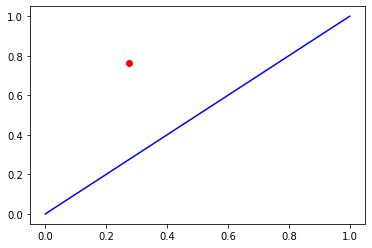

In [68]:
print("==========ANÁLISIS ROC VALIDACIÓN SIMPLE TIC-TAC-TOE DATA LAPLACE=TRUE===========")
clasificador2 = ClasificadorNaiveBayes(True)
clasificador2.entrenamiento(dataset2, estrategia2.particiones[0].indicesTrain)
pred = clasificador2.clasifica(dataset2, estrategia2.particiones[0].indicesTest)
ret = clasificador2.error(dataset2.extraeDatos(estrategia2.particiones[0].indicesTest), pred)
clasificador2.matrizConfusion(dataset2, estrategia2.particiones[0].indicesTest, pred)
clasificador2.curvaROC()
print("=================================================================================")

==========ANÁLISIS ROC VALIDACIÓN SIMPLE TIC-TAC-TOE DATA LAPLACE=FALSE==========


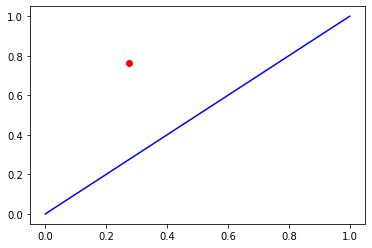

In [69]:
print("==========ANÁLISIS ROC VALIDACIÓN SIMPLE TIC-TAC-TOE DATA LAPLACE=FALSE==========")
clasificador20 = ClasificadorNaiveBayes(False)
clasificador20.entrenamiento(dataset2, estrategia2.particiones[0].indicesTrain)
pred = clasificador20.clasifica(dataset2, estrategia2.particiones[0].indicesTest)
ret = clasificador20.error(dataset2.extraeDatos(estrategia2.particiones[0].indicesTest), pred)
clasificador20.matrizConfusion(dataset2, estrategia2.particiones[0].indicesTest, pred)
clasificador20.curvaROC()
print("=================================================================================")

===============ANÁLISIS ROC VALIDACIÓN SIMPLE GERMAN DATA LAPLACE=TRUE===========


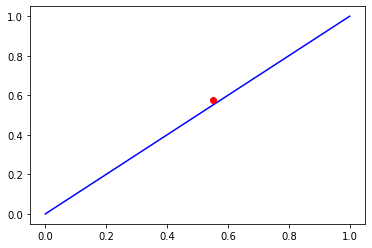

In [70]:
print("===============ANÁLISIS ROC VALIDACIÓN SIMPLE GERMAN DATA LAPLACE=TRUE===========")
clasificador3 = ClasificadorNaiveBayes(True)
clasificador3.entrenamiento(dataset3, estrategia3.particiones[0].indicesTrain)
pred = clasificador3.clasifica(dataset3, estrategia3.particiones[0].indicesTest)
ret = clasificador3.error(dataset3.extraeDatos(estrategia3.particiones[0].indicesTest), pred)
clasificador3.matrizConfusion(dataset3, estrategia3.particiones[0].indicesTest, pred)
clasificador3.curvaROC()
print("=================================================================================")

===============ANÁLISIS ROC VALIDACIÓN SIMPLE GERMAN DATA LAPLACE=FALSE==========


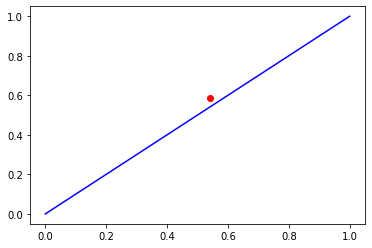

In [71]:
print("===============ANÁLISIS ROC VALIDACIÓN SIMPLE GERMAN DATA LAPLACE=FALSE==========")
clasificador30 = ClasificadorNaiveBayes(False)
clasificador30.entrenamiento(dataset3, estrategia3.particiones[0].indicesTrain)
pred = clasificador30.clasifica(dataset3, estrategia3.particiones[0].indicesTest)
ret = clasificador30.error(dataset3.extraeDatos(estrategia3.particiones[0].indicesTest), pred)
clasificador30.matrizConfusion(dataset3, estrategia3.particiones[0].indicesTest, pred)
clasificador30.curvaROC()
print("=================================================================================")

==========ANÁLISIS ROC VALIDACIÓN CRUZADA TIC-TAC-TOE DATA LAPLACE=TRUE===========


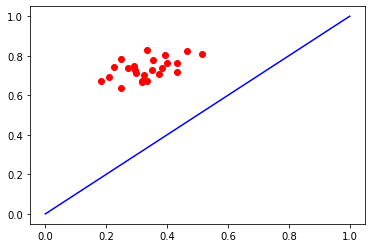

In [72]:
print("==========ANÁLISIS ROC VALIDACIÓN CRUZADA TIC-TAC-TOE DATA LAPLACE=TRUE===========")
clasificador21 = ClasificadorNaiveBayes(True)
for particion in estrategia21.particiones:
    clasificador21.entrenamiento(dataset2, particion.indicesTrain)
    pred = clasificador21.clasifica(dataset2, particion.indicesTest)
    ret = clasificador21.error(dataset2.extraeDatos(particion.indicesTest), pred)
    clasificador21.matrizConfusion(dataset2, particion.indicesTest, pred)
clasificador21.curvaROC()
print("==================================================================================")

==========ANÁLISIS ROC VALIDACIÓN CRUZADA TIC-TAC-TOE DATA LAPLACE=FALSE===========


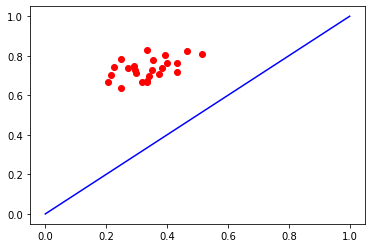

In [73]:
print("==========ANÁLISIS ROC VALIDACIÓN CRUZADA TIC-TAC-TOE DATA LAPLACE=FALSE===========")
clasificador22 = ClasificadorNaiveBayes(False)
for particion in estrategia21.particiones:
    clasificador22.entrenamiento(dataset2, particion.indicesTrain)
    pred = clasificador22.clasifica(dataset2, particion.indicesTest)
    ret = clasificador22.error(dataset2.extraeDatos(particion.indicesTest), pred)
    clasificador22.matrizConfusion(dataset2, particion.indicesTest, pred)
clasificador22.curvaROC()
print("==================================================================================")

===============ANÁLISIS ROC VALIDACIÓN CRUZADA GERMAN DATA LAPLACE=TRUE===========


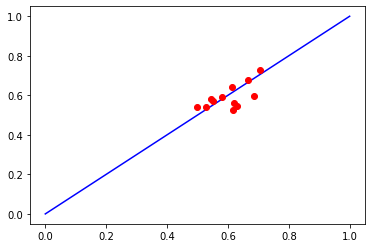

In [74]:
print("===============ANÁLISIS ROC VALIDACIÓN CRUZADA GERMAN DATA LAPLACE=TRUE===========")
clasificador31 = ClasificadorNaiveBayes(True)
for particion in estrategia31.particiones:    
    clasificador31.entrenamiento(dataset3, particion.indicesTrain)
    pred = clasificador31.clasifica(dataset3, particion.indicesTest)
    ret = clasificador31.error(dataset3.extraeDatos(particion.indicesTest), pred)
    clasificador31.matrizConfusion(dataset3, particion.indicesTest, pred)
clasificador31.curvaROC()
print("===================================================================================")

===============ANÁLISIS ROC VALIDACIÓN CRUZADA GERMAN DATA LAPLACE=FALSE===========


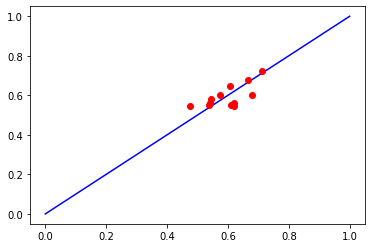

In [75]:
print("===============ANÁLISIS ROC VALIDACIÓN CRUZADA GERMAN DATA LAPLACE=FALSE===========")
clasificador32 = ClasificadorNaiveBayes(False)
for particion in estrategia31.particiones:    
    clasificador32.entrenamiento(dataset3, particion.indicesTrain)
    pred = clasificador32.clasifica(dataset3, particion.indicesTest)
    ret = clasificador32.error(dataset3.extraeDatos(particion.indicesTest), pred)
    clasificador32.matrizConfusion(dataset3, particion.indicesTest, pred)
clasificador32.curvaROC()
print("===================================================================================")

===============ANÁLISIS ROC SIMPLE GERMAN DATA SKLEARN===========


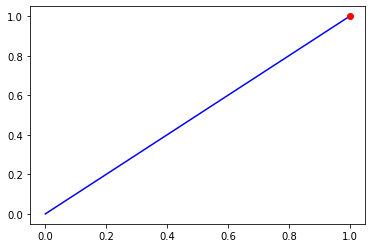

In [80]:
print("===============ANÁLISIS ROC SIMPLE GERMAN DATA SKLEARN===========")
X_train, X_test, y_train, y_test = validacion_simple_sklearn(dataset2, 0.8)
pred =  nb_sklearn(X_train, y_train, X_test)

matriz, tpr, fpr = matriz_confusion_sklearn(pred,y_test)
curvaROC_sklearn(fpr,tpr)
print("===================================================================================")

===============ANÁLISIS ROC SIMPLE TIC-TAC-TOE DATA SKLEARN===========


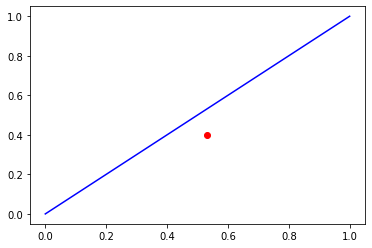

In [81]:
print("===============ANÁLISIS ROC SIMPLE TIC-TAC-TOE DATA SKLEARN===========")
X_train, X_test, y_train, y_test = validacion_simple_sklearn(dataset3, 0.8)
pred =  nb_sklearn(X_train, y_train, X_test)

matriz, tpr, fpr = matriz_confusion_sklearn(pred,y_test)
curvaROC_sklearn(fpr,tpr)
print("===================================================================================")

Solo se han realizado análisis ROC para el caso de los datasets "tic-tac-toe" y "german", ya que la clasificación en ambos casos es binaria, mientras que el dataset "lenses.data" clasifica entre 3 clases distintas.

<h3> CONCLUSIONES </h3>